In [1]:

import numpy as np # library to handle data in a vectorized manner
!pip install geopy
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
!pip install lxml
import lxml


In [3]:
!pip3 install lxml


**Assignement description**

Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:

In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?
These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.


**For the purpose of this week's project I will explore the region of Cascais.**

Cascais is located in Lisbon, Portugal.

Regions in Portugal can drilled down from Distrito -> Concelho -> Freguesia -> Localidade.
In this example, Lisbon is the 'Distrito, and we are going to explore Cascais which is a 'Concelho'. 

Let's imagine I am visiting Portugal and I really like italian food.
The problem to be solved is in which Hotel should I be hosted in order to be closer to all the Italian Restaurants in Cascais.

This Dataset is a subset of a dataset found on https://github.com/cusco/ctt. The referenced dataset contains all the streets across Portugal along with a lot more information. It might be a little outdated but it was the most complete way to find a list of 'Distritos', 'Concelhos', 'Municípios' and 'Localidades'.

The loaded CSV is filtered by 'Concelho' = 'Cascais' for the sake of a smaller dataset size.



In [4]:
import lxml
table = pd.read_csv('ctt-lat-lng-cascais.csv', sep=';')


Removing unnecessary columns and duplicated rows to achieve a unique column of 'Localidade'

In [5]:

table_aux = table[['LOCALIDADE']].drop_duplicates()
table_final = table_aux.sort_values(by=['LOCALIDADE']).reset_index(drop=True)
table_final.head()



,LOCALIDADE
0,Abóboda
1,Alapraia
2,Alcabideche
3,Alcoitão
4,Aldeia de Juzo


In [6]:
!pip install geocoder

import geocoder # import geocoder

**Utilizing Geocoder to discover each 'Localidade''s coordinates**

In [7]:
latitude=[]
longitude=[]
for localidade in table_final['LOCALIDADE']:
    g = geocoder.arcgis('{}, Cascais, Portugal'.format(localidade))
    print(localidade, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Cascais, Portugal'.format(localidade))
        print(localidade, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

Abóboda [38.72556000000003, -9.333789999999965]
Alapraia [38.707520000000045, -9.375459999999975]
Alcabideche [38.73380000000003, -9.408969999999954]
Alcoitão [38.734950000000026, -9.39656999999994]
Aldeia de Juzo [38.72977000000003, -9.448019999999929]
Alto dos Campitos [39.21372000000008, -8.418949999999938]
Alto dos Gaios [38.71536000000003, -9.381419999999935]
Alto dos Lombos [38.68936000000008, -9.329029999999932]
Amoreira [38.71850000000006, -9.408829999999966]
Areia [38.719070000000045, -9.462699999999927]
Areias [38.72005000000007, -9.463629999999966]
Arneiro [38.70661000000007, -9.326129999999978]
Atibá [38.72312000000005, -9.380119999999977]
Bairro da Martinha [38.72009000000003, -9.387139999999931]
Bairro de Santo António [38.716980000000035, -9.405969999999968]
Baixo dos Gaios [38.71357000000006, -9.378019999999935]
Bicesse [38.730650000000026, -9.383979999999951]
Birre [38.71637000000004, -9.448499999999967]
Cabeço de Mouro [38.71377000000007, -9.332289999999944]
Caparide 

Adding the values from Geocoder to the data frame.

In [8]:
se_lat = pd.Series(latitude)
se_lon = pd.Series(longitude)
table_final['Latitude'] = se_lat.values
table_final['Longitude'] = se_lon.values


In [9]:
table_final

,LOCALIDADE,Latitude,Longitude
0,Abóboda,38.725560,-9.333790
1,Alapraia,38.707520,-9.375460
2,Alcabideche,38.733800,-9.408970
3,Alcoitão,38.734950,-9.396570
4,Aldeia de Juzo,38.729770,-9.448020
5,Alto dos Campitos,39.213720,-8.418950
6,Alto dos Gaios,38.715360,-9.381420
7,Alto dos Lombos,38.689360,-9.329030
8,Amoreira,38.718500,-9.408830
9,Areia,38.719070,-9.462700


**Lets draw a map with the 'Localidades' on the 'Concelho' of Cascais using Folium**

In [10]:
address = 'Cascais'

geolocator = Nominatim(user_agent="cascais_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cascais are {}, {}.'.format(latitude, longitude))

map_cascais = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, localidade in zip(table_final['Latitude'], table_final['Longitude'], table_final['LOCALIDADE']):
    label = '{}'.format(localidade)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cascais)  
    
map_cascais

The geograpical coordinate of Cascais are 38.72240025, -9.396909171649877.


Apparently the lat and lon of 'Localidade' Alto dos Campitos isn't being well scrapped. 

If we zoom out once we can see it being really far from Cascais.
By searching on google we can find that Alto dos Campitos is near Estoril so we are going to scrape it with that additional information

In [11]:
localidade_missing = 'Alto dos Campitos'
g_missing = geocoder.arcgis('{}, Estoril, Cascais, Portugal'.format(localidade_missing))
print(localidade_missing, g_missing.latlng)


Alto dos Campitos [38.703500000000076, -9.39769999999993]


Looks like we have a different set of coordinates which are inline with the remaining.

Fixing it on the dataframe.

In [12]:


table_final.loc[table_final['LOCALIDADE'] == 'Alto dos Campitos']

,LOCALIDADE,Latitude,Longitude
5,Alto dos Campitos,39.21372,-8.41895


In [13]:
table_final.loc[table_final['LOCALIDADE'] == 'Alto dos Campitos', ['Latitude']] = g_missing.latlng[0]
table_final.loc[table_final['LOCALIDADE'] == 'Alto dos Campitos', ['Longitude']] = g_missing.latlng[1]

**Lets check if it was fixed**

In [14]:
table_final.loc[table_final['LOCALIDADE'] == 'Alto dos Campitos']

,LOCALIDADE,Latitude,Longitude
5,Alto dos Campitos,38.7035,-9.3977


**It appears to be fixed so lets redraw**

In [15]:
address = 'Cascais'

geolocator = Nominatim(user_agent="cascais_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cascais are {}, {}.'.format(latitude, longitude))

map_cascais = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, localidade in zip(table_final['Latitude'], table_final['Longitude'], table_final['LOCALIDADE']):
    label = '{}'.format(localidade)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cascais)  
    
map_cascais

The geograpical coordinate of Cascais are 38.72240025, -9.396909171649877.


**We are all set with our dataset so let's get started with Foursquare**

Defining Foursquare setup

In [16]:
CLIENT_ID = 'JVGQLQH2OVHJ2QN4QX23HUROFWLCBGFEYKIVMRFQAQZQZYX0' # your Foursquare ID
CLIENT_SECRET = 'QMSOEHVVSPFIY43L5SS1GLXT2XS5S1MC5MZR4BB50XMUZG3K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

**Reusing the Function definition to iterate over a list of locations and its coordinates**

Utilizing a Radius of 5000 to make sure we don't miss any possible venues, we will delete the duplicates due to overlapping radius later

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Calling the previously defined function to retrieve all the venues of the dataframe's 'Localidades'

In [18]:
cascais_venues = getNearbyVenues(names=table_final['LOCALIDADE'],
                                   latitudes=table_final['Latitude'],
                                   longitudes=table_final['Longitude']
                                  )

Abóboda
Alapraia
Alcabideche
Alcoitão
Aldeia de Juzo
Alto dos Campitos
Alto dos Gaios
Alto dos Lombos
Amoreira
Areia
Areias
Arneiro
Atibá
Bairro da Martinha
Bairro de Santo António
Baixo dos Gaios
Bicesse
Birre
Cabeço de Mouro
Caparide
Carcavelos
Carrascal de Alvide
Carrascal de Manique
Cascais
Charneca
Cobre
Conceição da Abóboda
Estoril
Galiza
Guincho
Janes
Junqueiro
Linhó
Livramento
Lombos
Madorna
Malveira da Serra
Manique
Manique de Baixo
Matarraque
Matos Cheirinhos
Monte Estoril
Monte Leite
Murches
Murtal
Outeiro de Polima
Pai do Vento
Parede
Penedo
Polima
Ponte das Varandas
Quenena
Quinta da Marinha
Rana
Rebelva
Ribeira da Penha Longa
Sassoeiros
São Domingos de Rana
São João do Estoril
São Pedro do Estoril
Talaíde
Tires
Torre
Trajouce
Zambujal
Zambujeiro


**List head venues**

In [19]:
print(cascais_venues.shape)
cascais_venues.head()

(6532, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abóboda,38.72556,-9.33379,Burger King,38.724053,-9.336372,Fast Food Restaurant
1,Abóboda,38.72556,-9.33379,Bugio Terrace,38.712962,-9.324767,Lounge
2,Abóboda,38.72556,-9.33379,Casa das Francesinhas,38.724810,-9.322853,Portuguese Restaurant
3,Abóboda,38.72556,-9.33379,Lagoas Health Club,38.714207,-9.309109,Gym / Fitness Center
4,Abóboda,38.72556,-9.33379,A Boa Petisqueira da Mina,38.706679,-9.323525,Portuguese Restaurant


**Let's see the different venue types**

In [20]:
cascais_venues['Venue Category'].drop_duplicates()

0                Fast Food Restaurant
1                              Lounge
2               Portuguese Restaurant
3                Gym / Fitness Center
5                                Café
7                                 Gym
9                               Hotel
11                 African Restaurant
12                     Ice Cream Shop
13                          Bookstore
14                             Garden
16                          BBQ Joint
17                               Park
19                             Bakery
20                Japanese Restaurant
23                        Art Gallery
25                              Beach
28                       Burger Joint
34                         Soup Place
35                 Chinese Restaurant
42               Brazilian Restaurant
44                              Trail
45                            Factory
47                           Pharmacy
50                 Seafood Restaurant
52                        Supermarket
55          

**Filtering by Italian Restaurants and might aswell add Pizza Places**

In [21]:
cascais_italian_restaurants_aux = cascais_venues.loc[(cascais_venues['Venue Category'] == 'Italian Restaurant') | (cascais_venues['Venue Category'] == 'Pizza Place')]
cascais_italian_restaurants_aux.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
85,Abóboda,38.72556,-9.33379,Trecento Sessanta,38.683681,-9.342899,Pizza Place
117,Alapraia,38.70752,-9.37546,Choupana Gordinni,38.697044,-9.381266,Italian Restaurant
122,Alapraia,38.70752,-9.37546,Lamassa - Fresh Handmade Pasta,38.703685,-9.393085,Italian Restaurant
279,Alcabideche,38.73380,-9.40897,Il Siciliano,38.697552,-9.421638,Italian Restaurant
282,Alcabideche,38.73380,-9.40897,Capricciosa,38.700902,-9.415504,Italian Restaurant



**Droping duplicates due to overlapping radius among 'Localidades'**

In [22]:
cascais_italian_restaurants= cascais_italian_restaurants_aux[['Venue','Venue Latitude','Venue Longitude','Venue Category']].drop_duplicates()
cascais_italian_restaurants

,Venue,Venue Latitude,Venue Longitude,Venue Category
85,Trecento Sessanta,38.683681,-9.342899,Pizza Place
117,Choupana Gordinni,38.697044,-9.381266,Italian Restaurant
122,Lamassa - Fresh Handmade Pasta,38.703685,-9.393085,Italian Restaurant
279,Il Siciliano,38.697552,-9.421638,Italian Restaurant
282,Capricciosa,38.700902,-9.415504,Italian Restaurant
295,Gordinni Marina,38.692019,-9.419588,Italian Restaurant
296,The Mix,38.690249,-9.422171,Italian Restaurant
430,Tiffosi,38.752228,-9.448579,Pizza Place
718,Capricciosa,38.677509,-9.329824,Pizza Place
1170,Massarella,38.714399,-9.328754,Pizza Place


**Let's draw the restaurants on the map**


In [23]:
address = 'Cascais'

geolocator = Nominatim(user_agent="cascais_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cascais are {}, {}.'.format(latitude, longitude))

map_cascais_italian_restaurants = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, restaurant_name, restaurant_type in zip(cascais_italian_restaurants['Venue Latitude'], cascais_italian_restaurants['Venue Longitude'], cascais_italian_restaurants['Venue'], cascais_italian_restaurants['Venue Category'] ):
    label = '{}, {}'.format(restaurant_name,restaurant_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cascais_italian_restaurants)  
    
map_cascais_italian_restaurants

The geograpical coordinate of Cascais are 38.72240025, -9.396909171649877.


**Let's now add all the possible places to be hosted to the map**

First let's find out the Hotels, Resorts and Hostels near Cascais

In [24]:
cascais_bookings_aux = cascais_venues.loc[(cascais_venues['Venue Category'] == 'Hotel') | (cascais_venues['Venue Category'] == 'Resort') | (cascais_venues['Venue Category'] == 'Hostel') ]
cascais_bookings_aux.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
9,Abóboda,38.72556,-9.33379,Lagoas Park Hotel,38.714855,-9.309450,Hotel
113,Alapraia,38.70752,-9.37546,Palácio Estoril Hotel Golf & SPA,38.704751,-9.396607,Hotel
125,Alapraia,38.70752,-9.37546,InterContinental Estoril,38.704330,-9.405819,Hotel
135,Alapraia,38.70752,-9.37546,Somewhere Estoril Guest House,38.705316,-9.394970,Hotel
139,Alapraia,38.70752,-9.37546,Hotel Cascais Miragem,38.702467,-9.410972,Hotel


**Dropping the duplicates due to overlapping 'Localidade' radius**

In [25]:
cascais_bookings= cascais_bookings_aux[['Venue','Venue Latitude','Venue Longitude','Venue Category']].drop_duplicates()
cascais_bookings

,Venue,Venue Latitude,Venue Longitude,Venue Category
9,Lagoas Park Hotel,38.714855,-9.309450,Hotel
113,Palácio Estoril Hotel Golf & SPA,38.704751,-9.396607,Hotel
125,InterContinental Estoril,38.704330,-9.405819,Hotel
135,Somewhere Estoril Guest House,38.705316,-9.394970,Hotel
139,Hotel Cascais Miragem,38.702467,-9.410972,Hotel
210,Penha Longa Resort,38.761407,-9.397055,Hotel
257,The Albatroz Hotel,38.699910,-9.417177,Hotel
258,Grande Real Villa Itália Hotel e Spa,38.691037,-9.424179,Resort
263,Farol Hotel,38.690436,-9.422119,Hotel
411,Fortaleza do Guincho,38.728171,-9.476295,Hotel


**Let's draw, in orange, the possible booking places on map we've drawn previously**

In [26]:
for lat, lng, booking_name, booking_type in zip(cascais_bookings['Venue Latitude'], cascais_bookings['Venue Longitude'], cascais_bookings['Venue'], cascais_bookings['Venue Category'] ):
    label = '{}, {}'.format(booking_name,booking_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#cc8631',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cascais_italian_restaurants)  
    
map_cascais_italian_restaurants

**Let's try to find the most optimal place to book in terms of distance to all the restaurants**

mpu library provides a function to calculate the Haversine distance between two coordinates.

Haversine determines the great-circle distance between two points on a sphere given their longitudes and latitudes which will suit us perfectly.


In [27]:
!pip install mpu
import mpu

**Lets iterate each booking place and each restaurant to calculate the distance between each possible pairing and append it to a list**

In [28]:
booking_restaurants_distance = []

for lat_booking, lng_booking, booking_name, booking_type in zip(cascais_bookings['Venue Latitude'], cascais_bookings['Venue Longitude'], cascais_bookings['Venue'], cascais_bookings['Venue Category'] ):
    for lat_restaurant, lng_restaurant, restaurant_name, restaurant_type in zip(cascais_italian_restaurants['Venue Latitude'], cascais_italian_restaurants['Venue Longitude'], cascais_italian_restaurants['Venue'], cascais_italian_restaurants['Venue Category'] ):
        #print(booking_name + ' - ' + restaurant_name + ' = ' '{:.1f}'.format(mpu.haversine_distance((lat_booking, lng_booking), (lat_restaurant, lng_restaurant))) )
        booking_restaurants_distance.append([booking_name,booking_type,lat_booking,lng_booking, restaurant_name,mpu.haversine_distance((lat_booking, lng_booking), (lat_restaurant, lng_restaurant))])

**Converting that list of pairs into a Pandas Dataframe so we can explore it**

In [29]:
booking_restaurants_distance_pd = pd.DataFrame(booking_restaurants_distance)
booking_restaurants_distance_pd.columns = ['Booking','Booking Type',   'Booking Latitude',         'Booking Longitude',       'Restaurant',                  'Distance']
booking_restaurants_distance_pd.head()

,Booking,Booking Type,Booking Latitude,Booking Longitude,Restaurant,Distance
0,Lagoas Park Hotel,Hotel,38.714855,-9.30945,Trecento Sessanta,4.521263
1,Lagoas Park Hotel,Hotel,38.714855,-9.30945,Choupana Gordinni,6.538750
2,Lagoas Park Hotel,Hotel,38.714855,-9.30945,Lamassa - Fresh Handmade Pasta,7.362378
3,Lagoas Park Hotel,Hotel,38.714855,-9.30945,Il Siciliano,9.923055
4,Lagoas Park Hotel,Hotel,38.714855,-9.30945,Capricciosa,9.332142


**Lets calculate the average distance per booking place so we can see how well suited each booking place is in terms of distance to the restaurants**

In [30]:
bookings_restaurants_distance_mean = booking_restaurants_distance_pd.groupby(by=['Booking','Booking Type']).mean()
bookings_restaurants_distance_mean.sort_values(by=['Distance'])


,,Booking Latitude,Booking Longitude,Distance
Booking,Booking Type,,,
Somewhere Estoril Guest House,Hotel,38.705316,-9.394970,5.195130
Palácio Estoril Hotel Golf & SPA,Hotel,38.704751,-9.396607,5.238662
InterContinental Estoril,Hotel,38.704330,-9.405819,5.486354
Hotel Estoril Eden,Hotel,38.703827,-9.407817,5.553244
Hotel Cascais Miragem,Hotel,38.702467,-9.410972,5.672590
Hotel Estoril 7,Hotel,38.740338,-9.399394,5.716189
The Albatroz Hotel,Hotel,38.699910,-9.417177,5.945307
Farol Hotel,Hotel,38.690436,-9.422119,6.520741
Pestana Sintra Golf Conference & Spa Resort,Hotel,38.762963,-9.367316,6.594420


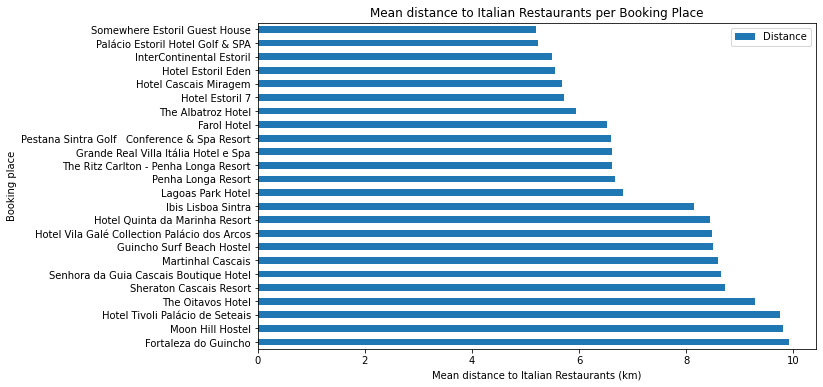

In [31]:
aux = bookings_restaurants_distance_mean.reset_index()
aux2 = aux[['Booking','Distance']].sort_values(by=['Distance'], ascending=False)
aux2

aux2.plot(kind='barh',x='Booking', y='Distance', figsize=(10, 6))
#%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ylabel('Booking place') # add to x-label to the plot
plt.xlabel('Mean distance to Italian Restaurants (km)') # add y-label to the plot
plt.title('Mean distance to Italian Restaurants per Booking Place') # add title to the plot

plt.show()


**Now that we know the average distance between each booking place and all the restaurants let's settle for anything less than an average of 6 km of distance**

In [32]:
bookings_final = bookings_restaurants_distance_mean.loc[(bookings_restaurants_distance_mean['Distance'] < 6 )].reset_index()
bookings_final


,Booking,Booking Type,Booking Latitude,Booking Longitude,Distance
0,Hotel Cascais Miragem,Hotel,38.702467,-9.410972,5.672590
1,Hotel Estoril 7,Hotel,38.740338,-9.399394,5.716189
2,Hotel Estoril Eden,Hotel,38.703827,-9.407817,5.553244
3,InterContinental Estoril,Hotel,38.704330,-9.405819,5.486354
4,Palácio Estoril Hotel Golf & SPA,Hotel,38.704751,-9.396607,5.238662
5,Somewhere Estoril Guest House,Hotel,38.705316,-9.394970,5.195130
6,The Albatroz Hotel,Hotel,38.699910,-9.417177,5.945307


In [33]:
bookings_restaurants_distance_mean.sort_values(by=['Distance'])
for lat, lng, booking_name, booking_type in zip(bookings_final['Booking Latitude'], bookings_final['Booking Longitude'], bookings_final['Booking'], bookings_final['Booking Type'] ):
    label = '{}, {}'.format(booking_name,booking_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#871010',
        fill_opacity=1,
        parse_html=False).add_to(map_cascais_italian_restaurants)  
    
map_cascais_italian_restaurants

**In red we have the recommended Hotels/Resorts/Hostels in terms of average distance to the restaurants, in blue the remaining hotels and in orange the restaurants**

Most of the recomended booking places are also seaside which can be a plus!
